# 根据fake_tweets产生的数据文件进行分析

In [1]:
from my_weapon import *
from collections import defaultdict, Counter
from IPython.display import display

In [2]:
%time groups_url_tweets = [json.load(open("disk/url_ts_media_{}.json".format(i))) for i in range(8)]

CPU times: user 56.5 s, sys: 11.6 s, total: 1min 8s
Wall time: 1min 42s


0 ...
1 ...
2 ...
3 ...
4 ...
5 ...
6 ...
7 ...


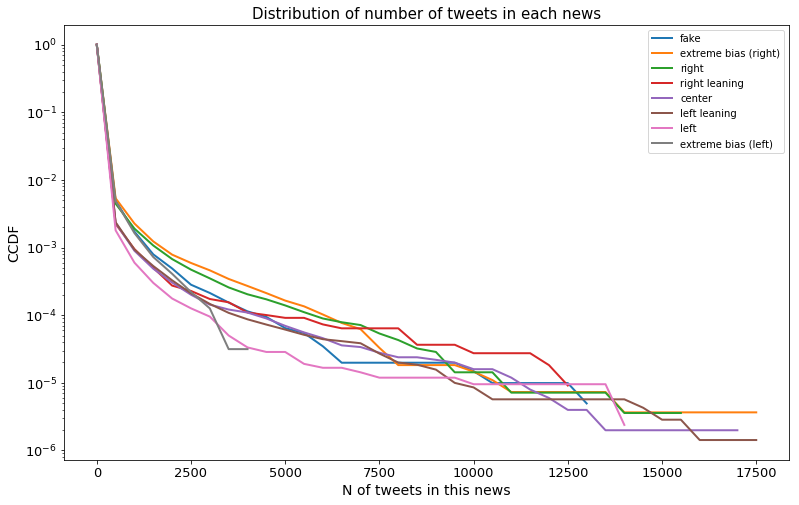

In [3]:
map_labels = {
    "0": "fake",
    "1": "extreme bias (right)",
    "2": "right",
    "3": "right leaning",
    "4": "center",
    "5": "left leaning",
    "6": "left",
    "7": "extreme bias (left)"
}

def get_cdf_pdf(data, mini, maxi, step, norm=True):
    x = np.arange(mini, maxi, step)
    # print(x, len(x))
    cdf = np.zeros(len(x))
    pdf = np.zeros(len(x))
    cnt = 0
    for d in data:
        if d < mini or d >= maxi:
            continue
            
        cnt += 1
        for i, _x in enumerate(x):
            if d >= _x:
                cdf[i] += 1
        
        for i, _x in enumerate(x):
            if i == (len(x) - 1):
                pdf[i] += 1
            elif _x <= d < x[i+1]: 
                pdf[i] += 1
                break

    # print(cdf[0], cnt, sum(pdf))
    if norm:
        cdf = cdf / cnt
        pdf = pdf / cnt
    # print(cdf)
    return x, cdf, pdf

num_of_tweets = {}
plt.figure(figsize=(13, 8))
for i in range(8):
    print(i, "...")
    url_tweets = groups_url_tweets[i]
    data = pd.Series([len(url_tweet["tweets"]) for url_tweet in url_tweets])
    num_of_tweets[map_labels[str(i)]] = data
    x, cdf, pdf = get_cdf_pdf(data, 0, 20000, 500)
    
    _zero_i = -1
    for j in range(len(cdf)):
        if cdf[j] == 0:
            _zero_i = j
            break
    x = x[:_zero_i]
    cdf = cdf[:_zero_i]
        
    plt.plot(x, cdf, label=map_labels[str(i)], lw=2)
#     data.hist(bins=50)
    
plt.title('Distribution of number of tweets in each news', fontsize=15)
plt.ylabel('CCDF', fontsize=14)
plt.xlabel('N of tweets in this news', fontsize=14)
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
plt.legend()
plt.yscale("log")
# plt.xscale("log")
#     plt.savefig('fig/distribution_size_fake_news.pdf', dpi=300)

plt.show()
plt.close()

## 针对上图的描述性统计

In [4]:
pd.DataFrame(num_of_tweets).describe()

,fake,extreme bias (right),right,right leaning,center,left leaning,left,extreme bias (left)
count,202074.000000,273890.000000,280023.000000,109641.000000,503600.000000,702822.000000,420213.000000,31798.000000
mean,16.408474,16.295761,16.255683,10.646337,13.782198,12.122836,11.282481,20.275678
std,113.583482,155.845464,133.919273,110.257874,103.808373,141.752738,78.414833,91.992912
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,5.000000,4.000000,5.000000,4.000000,7.000000,5.000000,5.000000,10.000000
max,13338.000000,23882.000000,15827.000000,12582.000000,22344.000000,69052.000000,14176.000000,4056.000000


0 ...
1 ...
2 ...
3 ...
4 ...
5 ...
6 ...
7 ...


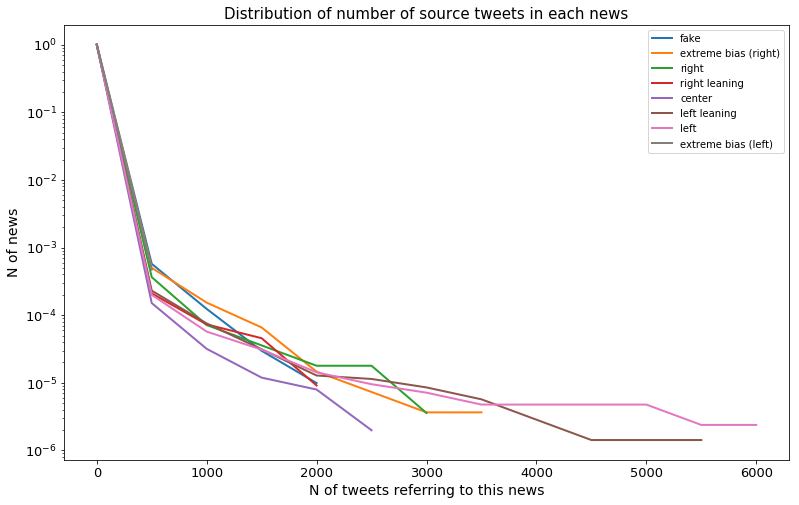

In [5]:
num_of_sources = {}
plt.figure(figsize=(13, 8))
for i in range(8):
    print(i, "...")
    url_tweets = groups_url_tweets[i]
    
    data = []
    for url_tweet in url_tweets:
        _len = len([t for t in url_tweet["tweets"] if t["is_source"]==1])
        data.append(_len)
        if _len == 0:
            print(url_tweet["URL"], len(url_tweet["tweets"]))
    data = pd.Series(data)
    num_of_sources[map_labels[str(i)]] = data
    x, cdf, pdf = get_cdf_pdf(data, 0, 10000, 500)
    
    _zero_i = -1
    for j in range(len(cdf)):
        if cdf[j] == 0:
            _zero_i = j
            break
    x = x[:_zero_i]
    cdf = cdf[:_zero_i]
        
    plt.plot(x, cdf, label=map_labels[str(i)], lw=2)
#     data.hist(bins=50)
    
plt.title('Distribution of number of source tweets in each news', fontsize=15)
plt.ylabel('N of news', fontsize=14)
plt.xlabel('N of tweets referring to this news', fontsize=14)
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
plt.legend()
plt.yscale("log")
# plt.xscale("log")
# plt.savefig('fig/distribution_size_fake_news.pdf', dpi=300)

plt.show()
plt.close()

In [6]:
pd.DataFrame(num_of_sources).describe()

,fake,extreme bias (right),right,right leaning,center,left leaning,left,extreme bias (left)
count,202074.000000,273890.000000,280023.000000,109641.000000,503600.000000,702822.000000,420213.000000,31798.000000
mean,5.619704,4.635945,4.384583,3.558723,4.271910,3.550340,3.898356,5.764576
std,28.133368,29.592858,24.901905,20.337285,18.498921,22.508893,24.059844,23.348622
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2133.000000,3946.000000,3295.000000,2470.000000,2544.000000,5834.000000,6434.000000,902.000000


### 专门针对用户的分析，放到analyze_users.ipy 和 analyze_IRAs.ipynb 中～

In [7]:
import pendulum
   
def plot_day(i, url, sorted_dts, sorted_dts2=None, save=False):
    """
    包含了两条线！
    """

    plt.figure(figsize=(10, 6))
    ts = cal_ts_day(sorted_dts)
    ts.plot()
    
    if sorted_dts2:
        ts2 = cal_ts_day(sorted_dts2)
        ts2.plot()
    
    # configure
    plt.ylabel('N of tweets with this fake news', fontsize=15)
    plt.xticks(fontsize=11); plt.yticks(fontsize=11)
#     plt.xlabel('$Date$', fontsize=15)
#     plt.title(url)
    
    if save:
        plt.savefig('fig/{}-{}-overall-spread.pdf'.format(i, url), dpi=300)
    else:
        plt.show()
    
    plt.close()


def plot_48hours(i, url, sorted_dts, sorted_dts2=None, save=False):
    """
    包含了两条线！
    """
    
#     print(url)
#     print("实际传播开始和结束时间：", sorted_dts[0], sorted_dts[-1])

    plt.figure(figsize=(10, 6))
    ts = cal_ts_48hours(sorted_dts)
    ts.plot()
    
    if sorted_dts2:
        ts2 = cal_ts_48hours(sorted_dts2)
        ts2.plot()

    
    # configure
    plt.ylabel('N of tweets with this fake news', fontsize=15)
    plt.xticks(fontsize=11); plt.yticks(fontsize=11)
#     plt.xlabel('$Date$', fontsize=15)
#     plt.title(url)

    if save:
        plt.savefig('fig/{}-{}-first-48-hours.pdf'.format(i, url), dpi=300)
    else:
        plt.show()
        
    plt.close()


In [8]:
for i, url_tweet in enumerate(url_tweets):

    if i == 0:
        continue
    if i >= 3:
        break
    print("plot {} ~".format(i))
    
    url = url_tweet["url"]
    tweets_list = url_tweet["tweets"]
    dts = [t["dt"] for t in tweets_list]
    
    dts2 = [t["dt"] for t in tweets_list if t["is_source"]==1]
    plot_day(i, url, dts, dts2)
    plot_48hours(i, url, dts, dts2)

#     plot_day(i, url, dts)
#     plot_48hours(i, url, dts)

plot 1 ~


KeyError: 'url'

---

## source对trump和hillary的态度

In [3]:
from SQLite_handler import opinion

first_opinion = []
staters_opinion = []
other_opinion = []

tweets_csv = pd.read_csv("data/fake-tweets.csv", usecols=["tweet_id", "is_first", "is_source"])


for i, row in tqdm(tweets_csv.iterrows()):
    tid = row["tweet_id"]
    opi = opinion(tid)
    if row["is_first"] == 1:
        first_opinion.append(opi)
    if row["is_source"] == 1:
        staters_opinion.append(opi)
    else:
        other_opinion.append(opi)
    

2562218it [10:21, 4120.16it/s]


Counter({1: 145411, 0: 43464, -1: 587})
Counter({1: 713400, 0: 181059, -1: 2585})
Counter({1: 1488826, 0: 175888, -1: 460})


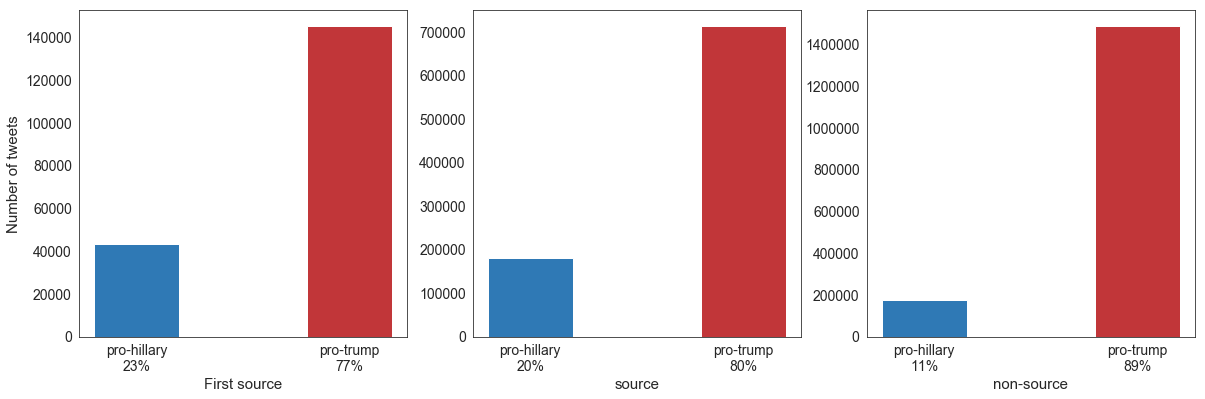

In [29]:
from collections import Counter
sns.set_style("white")
sns.color_palette("RdBu", n_colors=7)

count = Counter(first_opinion)
print(count)

label = ["pro-hillary", "pro-trump"]
plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.bar(1, count[0], color=sns.color_palette("RdBu")[5], width=0.2)
plt.bar(1.5, count[1], color=sns.color_palette("RdBu")[0], width=0.2)
label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 1.5], label)
plt.xlabel('First source', fontsize=15)
plt.ylabel('Number of tweets', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

count = Counter(staters_opinion)
print(count)

plt.subplot(132)
plt.bar(1, count[0], color=sns.color_palette("RdBu")[5], width=0.2)
plt.bar(1.5, count[1], color=sns.color_palette("RdBu")[0], width=0.2)
label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 1.5], label)
plt.xlabel('source', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

count = Counter(other_opinion)
print(count)

plt.subplot(133)
plt.bar(1, count[0], color=sns.color_palette("RdBu")[5], width=0.2)
plt.bar(1.5, count[1], color=sns.color_palette("RdBu")[0], width=0.2)
label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 1.5], label)
plt.xlabel('non-source', fontsize=15)
# plt.ylabel('N of fake sources', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

plt.savefig("fig/support.pdf", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [9]:
uids_of_IRA = set(json.load(open("data/IRA_map.json")).values())

In [62]:
len(tweets_csv["tweet_id"].unique())

2492013

## tweets_csv有多少url，多少is_source，多少is_first

In [8]:
len(tweets_csv["URL"].unique()), len(tweets_csv["user_id"].unique())

(184297, 208367)

## * 基于用户的转发网络构建

In [26]:
retweet_network = json.load(open("data/fake_retweet_network.json"))

In [20]:
def save_network():
    G = nx.DiGraph()

    nodes = tweets_csv["user_id"].tolist()
    edges = []
    dict_tweetid_userid = {}
    for _, row in tweets_csv.iterrows():
        dict_tweetid_userid[row["tweet_id"]] = row["user_id"]
    
    for n2, n1 in retweet_network.items():
        u1 = dict_tweetid_userid[n1]
        u2 = dict_tweetid_userid[n2]
        edges.append((u1, u2))

    print("add nodes from ...")
    G.add_nodes_from(nodes)
    print("add edge from ...")
    G.add_edges_from(edges)
    nx.write_gpickle(G, "data/fake_network.gpickle")
    
save_network()


188949it [00:26, 22041.75it/s]

add nodes from ...
add edge from ...


In [22]:
G = nx.read_gpickle("data/fake_network.gpickle")

In [25]:
G.number_of_nodes()

208367

In [26]:
G.number_of_edges()

1031782

In [29]:
import graph_tool.all as gt

def save_network_gt():
    g = gt.Graph()

    nodes = tweets_csv["user_id"].tolist()
    node_map = {n:i for i, n in enumerate(nodes)}
    
    dict_tweetid_userid = {}
    for _, row in tweets_csv.iterrows():
        dict_tweetid_userid[row["tweet_id"]] = row["user_id"]
    
    print("add nodes from ...")
    vlist = g.add_vertex(len(nodes))
        
    edges = []
    print("add edge from ...")
    for n2, n1 in retweet_network.items():
        u1 = node_map[dict_tweetid_userid[n1]]
        u2 = node_map[dict_tweetid_userid[n2]]
        g.add_edge(g.vertex(u1), g.vertex(u2))

    g.save("data/fake_network.gt")
    
save_network_gt()

add nodes from ...
add edge from ...


In [262]:
g = gt.load_graph("data/fake_network.gt")

In [273]:
g.vp.CI_out[3]

0

In [65]:
from random import random

def deg_sample():
    if random() > 0.5:
        return np.random.poisson(4), np.random.poisson(4)
    else:
        return np.random.poisson(20), np.random.poisson(20)
    
g = gt.random_graph(100, deg_sample)
g.save("data/test_network.gt")

In [73]:
# test graph-tool

# import graph_tool.draw

g = gt.Graph()
g.add_vertex(3)
g.add_edge(g.vertex(0), g.vertex(1))
for v in g.vertices():
    print(v)
for e in g.edges():
    print(e)

0
1
2
(0, 1)


## Their CI rank

data/fake_winners.json

In [118]:
winners = json.load(open("data/fake_winners.json"))

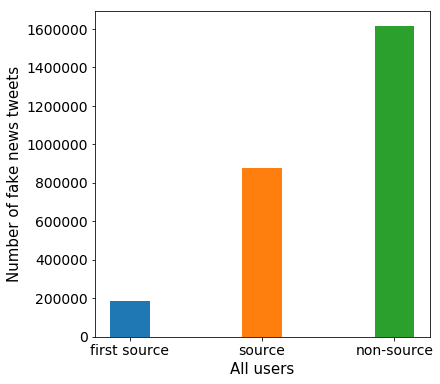

In [82]:
label = ["first source", "source", "non-source"]
plt.figure(figsize=(6, 6))

# plt.subplot(131)

plt.bar(1, len(tweets_csv[tweets_csv["is_first"]==1]), width=0.3)
plt.bar(2, len(tweets_csv[tweets_csv["is_source"]==1]), width=0.3)
plt.bar(3, len(tweets_csv[tweets_csv["is_source"]==0]), width=0.3)

plt.xticks([1, 2, 3], label)
plt.xlabel('All users', fontsize=15)
plt.ylabel('Number of fake news tweets', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.savefig("fig/N-of-all-users.pdf", dpi=300, bbox_inches='tight')
plt.show()
plt.tight_layout()
plt.close()

In [3]:
source_tweets = tweets_csv[tweets_csv["is_source"]==1]
"曾经为source的用户量", len(source_tweets["user_id"].unique())

('曾经为source的用户量', 84370)

### 分析fake news的source_content

In [14]:
import SQLite_handler
import importlib
importlib.reload(SQLite_handler)
    
tweet_ids = source_tweets["tweet_id"].tolist()
rsts = SQLite_handler.find_source(tweet_ids)

In [19]:
count = [r["source_content"] for r in rsts if r["source_content"] != -1]
_sum = len(count)
print("amount of tweets of which source can be found:", _sum)
count = Counter(count)

for k, v in count.most_common(20):
    print(k, '- {:.2%}'.format(v / _sum))

amount of tweets of which source can be found: 876655
Twitter Web Client - 33.36%
dlvr.it - 22.55%
Twitter for iPhone - 7.94%
Facebook - 7.71%
Twitter for Android - 5.80%
Twitter for iPad - 3.15%
Put your button on any page!  - 2.81%
Mobile Web - 2.48%
twitterfeed - 2.23%
IFTTT - 1.62%
Hootsuite - 1.04%
SocialOomph - 0.88%
Sprout Social - 0.86%
Linkis.com - 0.84%
Buffer - 0.64%
WordPress.com - 0.47%
Rignite - 0.41%
OS X - 0.32%
TweetDeck - 0.32%
Mobile Web (M5) - 0.26%


In [86]:
first_tweets = tweets_csv[tweets_csv["is_first"]==1]
"曾经为first source的用户量", len(first_tweets["user_id"].unique())

('曾经为first source的用户量', 24446)

In [33]:
ira_tweets = tweets_csv[tweets_csv["is_IRA"]==1]
'IRA用户量', len(ira_tweets["user_id"].unique())

NameError: name 'tweets_csv' is not defined

说明并没有匿名用户存在，非常好

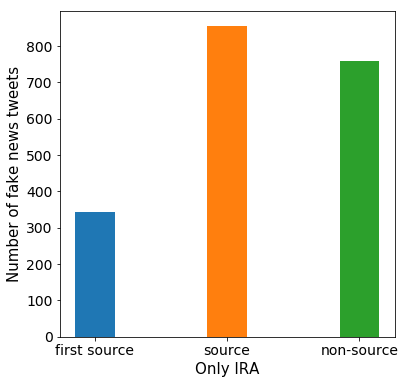

In [93]:
label = ["first source", "source", "non-source"]
plt.figure(figsize=(6, 6))

# plt.subplot(131)
plt.bar(1, len(ira_tweets[ira_tweets["is_first"]==1]), width=0.3)
plt.bar(2, len(ira_tweets[ira_tweets["is_source"]==1]), width=0.3)
plt.bar(3, len(ira_tweets[ira_tweets["is_source"]==0]), width=0.3)

# label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 2, 3], label)
plt.xlabel('Only IRA', fontsize=15)
plt.ylabel('Number of fake news tweets', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.savefig("fig/N-of-only-IRA.pdf", dpi=300, bbox_inches='tight')
plt.show()
plt.tight_layout()
plt.close()

## The influence of IRAs in fake news spreading

### IRA涉及了哪些URL

In [94]:
ira_url = set(ira_tweets["URL"])
ira_first_url = set(ira_tweets[ira_tweets["is_first"]==1]["URL"])
ira_source_url = set(ira_tweets[ira_tweets["is_source"]==1]["URL"])
non_source_url = set(ira_tweets[ira_tweets["is_source"]==0]["URL"])

len(ira_url), len(ira_first_url), len(ira_source_url), len(non_source_url)

(1274, 344, 696, 600)

### IRA涉及的URL影响了多少其他人？

In [95]:
from tqdm import tqdm

cnt = 0
cnt_first = 0
cnt_source = 0
cnt_non = 0
for i, row in tqdm(tweets_csv.iterrows()):
    if row["URL"] in ira_url:
        cnt += 1
    if row["URL"] in ira_first_url:
        cnt_first += 1
    if row["URL"] in ira_source_url:
        cnt_source += 1
    if row["URL"] in non_source_url:
        cnt_non += 1
cnt, cnt_first, cnt_source, cnt_non

2492013it [02:15, 18381.03it/s]


(263591, 599, 74070, 202404)

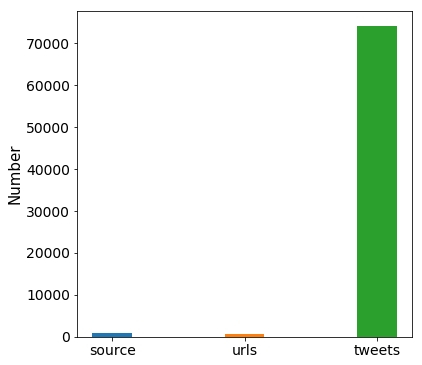

In [97]:
label = ["source", "urls", "tweets"]
plt.figure(figsize=(6, 6))

# plt.subplot(131)

plt.bar(1, len(ira_tweets[ira_tweets["is_source"]==1]), width=0.3)
plt.bar(2, len(ira_source_url), width=0.3)
plt.bar(3, cnt_source, width=0.3)

# label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 2, 3], label)
# plt.xlabel('All users', fontsize=15)
plt.ylabel('Number', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
# plt.yscale("log")
plt.savefig("fig/ira-source.pdf", dpi=300, bbox_inches='tight')
plt.show()
plt.tight_layout()
plt.close()

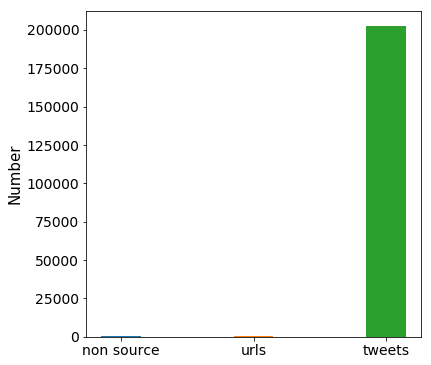

In [98]:
label = ["non source", "urls", "tweets"]
plt.figure(figsize=(6, 6))

# plt.subplot(131)

plt.bar(1, len(ira_tweets[ira_tweets["is_source"]==0]), width=0.3)
plt.bar(2, len(non_source_url), width=0.3)
plt.bar(3, cnt_non, width=0.3)

# label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 2, 3], label)
# plt.xlabel('All users', fontsize=15)
plt.ylabel('Number', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
# plt.yscale("log")
plt.savefig("fig/ira-source.pdf", dpi=300, bbox_inches='tight')
plt.show()
plt.tight_layout()
plt.close()

In [99]:
len(tweets_csv) / len(tweets_csv["URL"].unique())

13.521723088275989

In [100]:
len(ira_tweets[ira_tweets["is_source"]==1]) / len(ira_source_url)

1.228448275862069

In [101]:
cnt_non / len(non_source_url)

337.34

## IRA的被转发情况

In [102]:
all_tweets = pd.read_csv("data/ira_tweets_csv_hashed.csv", 
                         usecols=["tweetid", "userid", "retweet_count"])

In [104]:
ira_id = set(ira_tweets[ira_tweets["is_source"] == 1]["tweet_id"])
df = all_tweets.loc[all_tweets['tweetid'].isin(ira_id)]
df.describe()

,tweetid,retweet_count
count,8.550000e+02,855.000000
mean,7.816363e+17,9.987135
std,1.369839e+16,44.360178
min,7.345768e+17,0.000000
25%,7.769366e+17,0.000000
50%,7.818376e+17,0.000000
75%,7.942575e+17,1.000000
max,7.961374e+17,640.000000


# 用户分析 （Group）

In [20]:
user_count = pd.value_counts(tweets_csv["user_id"]).rename("is_fake")
user_count.head(25)
# type(user_count)

4855687055            8738
4831603043            7334
3374126201            4844
2242085304            4732
122455671             3738
758652815996776448    2956
4906718786            2908
2462473820            2879
750517084166193156    2766
382921457             2707
751963872899305472    2703
1075296265            2605
60893069              2594
759317433345769472    2491
825501626             2476
763982421297553408    2405
707278892801765377    2376
2700350600            2338
746875038901633024    2324
766499969696169984    2321
755614943039352832    2189
3274720530            2169
4857584175            2158
763518863212511232    2136
765648314159210496    2112
Name: is_fake, dtype: int64

## TOP sources

In [21]:
user_sources_count = tweets_csv["is_source"].groupby(tweets_csv["user_id"]).sum().sort_values(ascending=False)
user_sources_count.head(25)

user_id
4855687055            8610
4831603043            7332
3374126201            4844
2242085304            4732
122455671             3738
758652815996776448    2955
2462473820            2878
4906718786            2827
750517084166193156    2766
382921457             2706
751963872899305472    2702
1075296265            2605
60893069              2520
759317433345769472    2486
825501626             2460
763982421297553408    2405
707278892801765377    2376
2700350600            2338
746875038901633024    2324
766499969696169984    2321
755614943039352832    2189
4857584175            2158
763518863212511232    2136
3274720530            2128
765648314159210496    2112
Name: is_source, dtype: int64

In [22]:
user_sources_count["4855687055"]

8610

In [50]:
for uid in user_sources_count.head(25).index:
    try:
        print(uid, winners.index(uid) + 1)
    except:
        print(uid, -1)

4855687055 -1
4831603043 -1
3374126201 -1
2242085304 -1
122455671 -1
758652815996776448 -1
2462473820 -1
4906718786 -1
750517084166193156 -1
382921457 -1
751963872899305472 -1
1075296265 -1
60893069 -1
759317433345769472 -1
825501626 -1
763982421297553408 -1
707278892801765377 -1
2700350600 -1
746875038901633024 -1
766499969696169984 -1
755614943039352832 -1
4857584175 -1
763518863212511232 -1
3274720530 -1
765648314159210496 -1


## TOP first sources

In [23]:
user_first_count = tweets_csv["is_first"].groupby(tweets_csv["user_id"]).sum().sort_values(ascending=False)
user_first_count.head(25)

user_id
122455671             3701
4831603043            2481
60893069              2079
4496549793            1814
825501626             1689
3274720530            1683
3374126201            1565
14210021              1451
137637040             1102
18856867              1085
18208120              1028
138092553              916
634330366              881
112732163              851
359122436              781
1494835716             775
166721424              763
1246177122             759
2270900414             744
3326947147             733
2507996790             708
386235552              682
750517084166193156     679
4578277935             674
466090255              674
Name: is_first, dtype: int64

In [52]:
for uid in user_first_count.head(25).index:
    try:
        print(uid, winners.index(uid) + 1)
    except:
        print(uid, -1)

122455671 -1
4831603043 -1
60893069 -1
4496549793 -1
825501626 -1
3274720530 -1
3374126201 -1
14210021 -1
137637040 -1
18856867 -1
18208120 -1
138092553 -1
634330366 -1
112732163 -1
359122436 -1
1494835716 -1
166721424 -1
1246177122 -1
2270900414 -1
3326947147 -1
2507996790 -1
386235552 -1
750517084166193156 -1
4578277935 -1
466090255 -1


In [33]:
users = pd.concat([user_count, user_first_count, user_sources_count], axis=1, sort=False)
users["source_rate"] = users["is_source"] / users["is_fake"]
users["first_rate"] = users["is_first"] / users["is_fake"]
users["first_source_rate"] = users["is_first"] / users["is_source"]
users = users.fillna(0)
users.head()

,is_fake,is_first,is_source,source_rate,first_rate,first_source_rate
4855687055,8738,327,8610,0.985351,0.037423,0.037979
4831603043,7334,2481,7332,0.999727,0.338287,0.338380
3374126201,4844,1565,4844,1.000000,0.323080,0.323080
2242085304,4732,183,4732,1.000000,0.038673,0.038673
122455671,3738,3701,3738,1.000000,0.990102,0.990102


## 根据Get_User爬虫获取的信息进一步补充users数据项

In [35]:
user_info = pd.DataFrame([json.loads(line.strip()) for line in open("data/fake-users-info.json")])
user_info = user_info.rename(columns={'id_str': 'user_id'})
user_info = user_info.set_index("user_id")

tmp = pd.concat([users, user_info], axis=1, join="inner")
tmp["message"].fillna("User going well.", inplace=True)

In [30]:
tmp.to_csv("data/fake_users.csv")

# 全面分析涉及到的用户特征

In [36]:
users = tmp
# users = pd.read_csv("data/fake_users.csv")

In [45]:
# 用户已经被注销的那些tweets

tweets_csv[tweets_csv["user_id"].isin(users[users["message"]!="User going well."].index)]["tweet_id"].to_csv("data/tweets_id_user_not_found.csv")

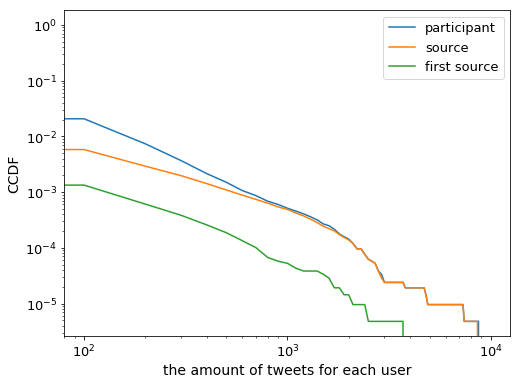

In [303]:
def get_cdf_pdf(data, mini, maxi, step, norm=True):
    x = [float(i) for i in np.arange(mini, maxi, step)]
    cdf = [0] * len(x)
    pdf = [0] * len(x)
    count = 0
    for d in data:
        d = float(d)
        if d < mini or d > maxi:
            continue
        count += 1
        for i in range(len(x)):
            if i == (len(x) - 1) and d >= x[i]:
                pdf[i] += 1
            elif d >= x[i] and d < x[i+1]:
                pdf[i] += 1

            if d >= x[i]:
                cdf[i] += 1

    if norm:
        cdf = [c / count for c in cdf]
        pdf = [p / count for p in pdf]

    return x, cdf, pdf

plt.figure(figsize=(8, 6))
x, cdf, pdf = get_cdf_pdf(users["is_fake"], 0, 10000, 100)
plt.plot(x, cdf, label="participant")
x, cdf, pdf = get_cdf_pdf(users["is_source"], 0, 10000, 100)
plt.plot(x, cdf, label="source")
x, cdf, pdf = get_cdf_pdf(users["is_first"], 0, 10000, 100)
plt.plot(x, cdf, label="first source")
# plt.title('Distribution of size of fake news ', fontsize=15)
plt.ylabel('CCDF', fontsize=14)
plt.xlabel('the amount of tweets for each user', fontsize=14)
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
plt.yscale("log")
plt.xscale("log")
plt.legend(fontsize=13)
plt.savefig('fig/distribution_starters.pdf', dpi=300)
plt.show()
plt.close()

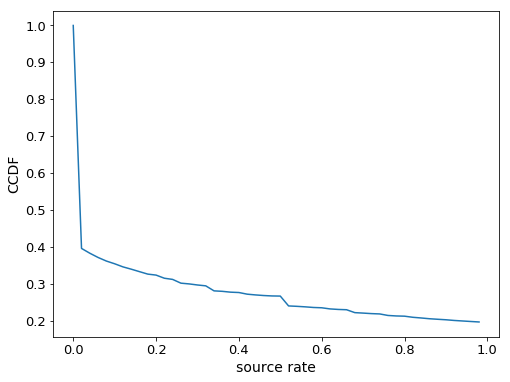

In [294]:
plt.figure(figsize=(8, 6))
x, cdf, pdf = get_cdf_pdf(users["source_rate"], 0, 1, 0.02)
plt.plot(x, cdf)
plt.ylabel('CCDF', fontsize=14)
plt.xlabel('source rate', fontsize=14)
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
# plt.yscale("log"); plt.xscale("log")
plt.savefig('fig/distribution_starters.pdf', dpi=300)
plt.show()
plt.close()

## 用户分类source top500与其他用户

为了研究source users的特点，需要进行对比，目前用户都是跟fake news有关（至少发布一条），选择其他剩余的全部用户作为对比组

In [99]:
top_users = users.sort_values("is_source", ascending=False).head(500)
top_users.to_csv("data/top500-fake-source-users.csv") # save top 500
other_users = users.sort_values("is_source", ascending=False).iloc[500:]

In [101]:
users["is_source_top"] = (users["is_fake"] >= 242)

## 0. 多少用户被suspened，或not found 

In [123]:
prop_df = (users["message"]
           .groupby(users["is_source_top"])
           .value_counts(normalize=True)
           .rename("Prop")
           .reset_index())

In [124]:
prop_df

,is_source_top,message,Prop
0,False,User going well.,0.827816
1,False,User has been suspended.,0.093130
2,False,User not found.,0.079055
3,True,User going well.,0.720036
4,True,User has been suspended.,0.238819
5,True,User not found.,0.041145


In [129]:
users["message"].value_counts()

User going well.            172369
User has been suspended.     19568
User not found.              16430
Name: message, dtype: int64

User going well.            0.827238
User has been suspended.    0.093911
User not found.             0.078851
Name: message, dtype: float64


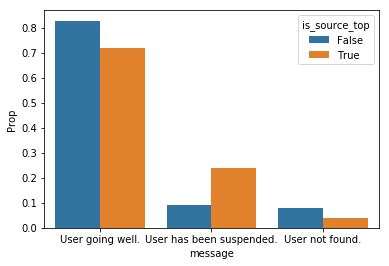

In [125]:
# cnt_not_found = len(users[users["code"]==50]) # 50 not found
# cnt_suspened = len(users[users["code"]==63]) # 63 suspened
# cnt_exists = len(users) - cnt_not_found - cnt_suspened

# height = [cnt_exists, cnt_suspened, cnt_not_found]
# bars = ('exists', 'suspened', 'not found')
# y_pos = np.arange(len(bars))
# plt.xticks(y_pos, bars)
# plt.bar(y_pos, height)

sns.barplot(x="message", y="Prop", data=prop_df, hue="is_source_top")
# users["message"].fillna("User going well.", inplace=True)
print(users["message"].value_counts(normalize=True))

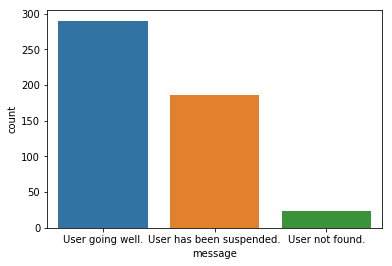

In [130]:
sns.countplot(x="message", data=top_users)

### 检查为什么会存在not found 

<span style="color:red">*已经用账号testkaykaykay进行测试，发现是自己主动deactive the account*</span>

所以suspened和not found的用户在传播过程中是非常重要的，我们不能放过对他们的研究。

In [248]:
uids_not_found = users[users["code"]==50].index

In [255]:
uids_not_found

Index(['137637040', '2711204024', '501567221', '2330112218', '356324005',
       '753082489711816704', '4856642956', '292586544', '4895096885',
       '105604742',
       ...
       '90271735', '734874821759229952', '3053971999', '371334115',
       '154234924', '136617688', '896136019', '2744985801', '307481163',
       '700050080'],
      dtype='object', length=16430)

In [254]:
importlib.reload(SQLite_handler)

<module 'SQLite_handler' from '/home/alex/kayzhou/election/SQLite_handler.py'>

In [256]:
users_data_not_found = SQLite_handler.find_users(uids_not_found)

In [275]:
c = 0
for u in users_data_not_found:
    if "error" in u:
        print(u)
        c += 1
c

{'user_id': '612933174', 'error': 'not found'}
{'user_id': '274551374', 'error': 'not found'}
{'user_id': '3271339802', 'error': 'not found'}
{'user_id': '757449025243131904', 'error': 'not found'}
{'user_id': '706122184985600000', 'error': 'not found'}
{'user_id': '2928819864', 'error': 'not found'}
{'user_id': '4418720713', 'error': 'not found'}
{'user_id': '2201548476', 'error': 'not found'}
{'user_id': '78047698', 'error': 'not found'}


9

In [258]:
users_data_not_found_large = SQLite_handler.find_users_from_large(uids_not_found)

In [273]:
c = 0
for u in users_data_not_found_large:
    if "error" in u:
        c += 1
c

2974

有2974在users.db中没有找到，其中9个用户在alex.db没有找到，可能是IRA

## 1. 地区及语言

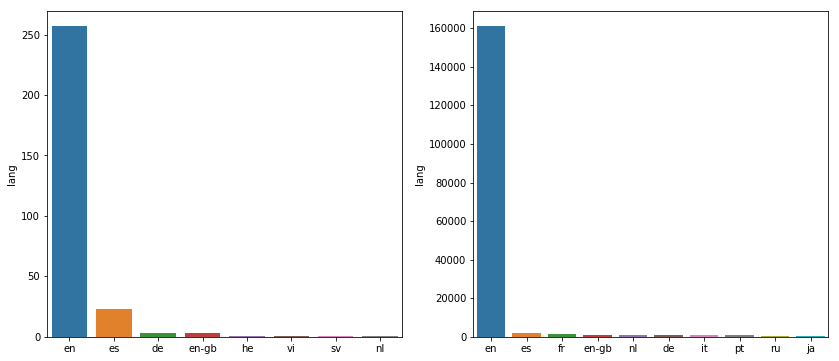

In [138]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
x = top_users.lang.value_counts()[:10]
sns.barplot(x=x.index, y=x)
plt.subplot(122)
x = other_users.lang.value_counts()[:10]
sns.barplot(x=x.index, y=x)

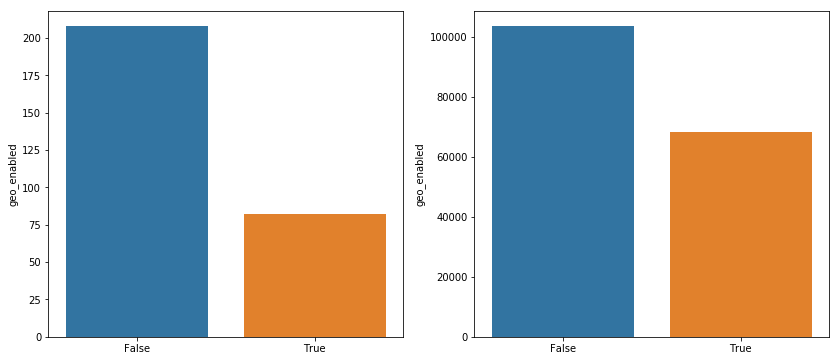

In [142]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
x = top_users.geo_enabled.value_counts()
sns.barplot(x=x.index, y=x)
plt.subplot(122)
x = other_users.geo_enabled.value_counts()
sns.barplot(x=x.index, y=x)

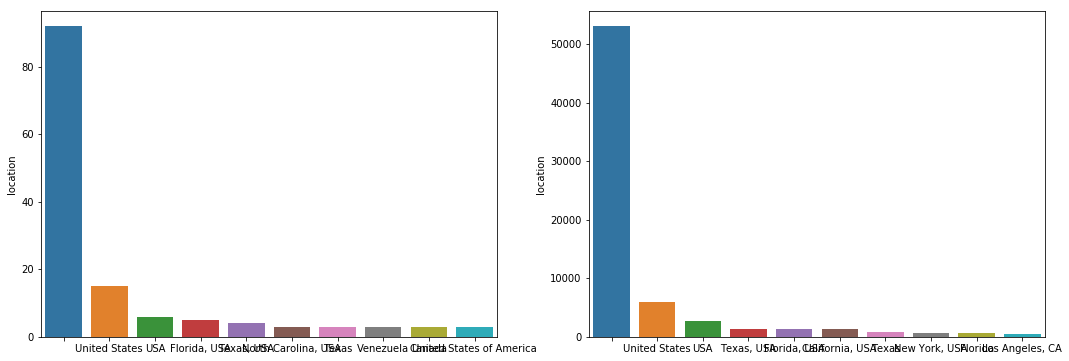

In [146]:
plt.figure(figsize=(18, 6))
plt.subplot(121)
x = top_users.location.value_counts()[:10]
# print(top_users.location.value_counts())
sns.barplot(x=x.index, y=x)
plt.subplot(122)
x = other_users.location.value_counts()[:10]
# print(other_users.location.value_counts())
sns.barplot(x=x.index, y=x)

# 2. 是否为验证用户 

False    288
True       2
Name: verified, dtype: int64
False    171331
True        748
Name: verified, dtype: int64


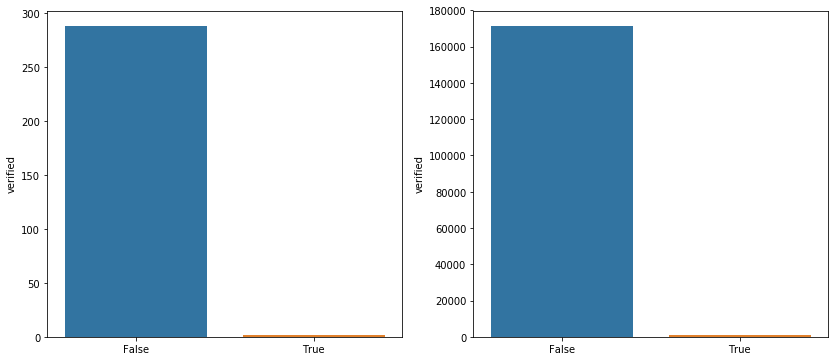

In [148]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
x = top_users.verified.value_counts()
print(x)
sns.barplot(x=x.index, y=x)
plt.subplot(122)
x = other_users.verified.value_counts()
print(x)
sns.barplot(x=x.index, y=x)

In [310]:
top_users = users.sort_values("is_source", ascending=False).head(500)
top_users.to_csv("data/top-fake-source-users.csv") # save top 500

# 3. fake news指标上的数值

In [307]:
top_users.describe()

,is_fake,is_first,is_source,source_rate,first_rate,first_source_rate,code,favourites_count,followers_count,friends_count,id,listed_count,statuses_count,time_zone,utc_offset
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,210.000000,290.000000,290.000000,290.000000,5.000000e+02,290.000000,2.900000e+02,0.0,0.0
mean,762.926000,169.300000,735.654000,0.960769,0.236179,0.243625,61.452381,19108.682759,19948.996552,10876.831034,2.382561e+17,273.306897,1.508388e+05,NaN,NaN
std,774.666688,317.297238,770.916332,0.096048,0.296095,0.300387,4.220039,39534.300396,70624.566055,29152.609896,3.526803e+17,1075.046048,1.835696e+05,NaN,NaN
min,242.000000,0.000000,242.000000,0.158537,0.000000,0.000000,50.000000,0.000000,22.000000,0.000000,1.267113e+07,0.000000,0.000000e+00,NaN,NaN
25%,352.750000,18.000000,326.500000,0.974556,0.031736,0.035021,63.000000,24.500000,853.000000,550.250000,1.978720e+08,30.250000,4.066850e+04,NaN,NaN
50%,495.500000,60.000000,463.000000,1.000000,0.101484,0.105237,63.000000,1546.000000,4226.000000,2961.000000,2.222342e+09,97.500000,9.859950e+04,NaN,NaN
75%,868.750000,189.250000,832.250000,1.000000,0.308026,0.319565,63.000000,21422.500000,14281.500000,9325.000000,7.512894e+17,232.500000,1.787560e+05,NaN,NaN
max,8738.000000,3701.000000,8610.000000,1.000000,1.000000,1.000000,63.000000,443492.000000,929739.000000,367616.000000,7.909311e+17,16015.000000,1.045437e+06,NaN,NaN


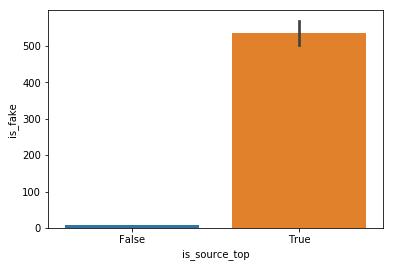

In [153]:
sns.barplot(x="is_source_top", y="is_fake", data=users, estimator=np.mean)

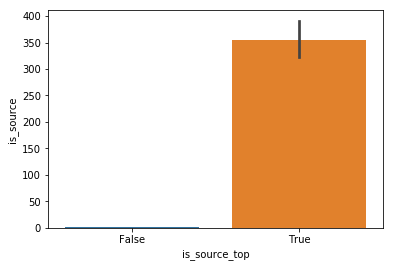

In [154]:
sns.barplot(x="is_source_top", y="is_source", data=users, estimator=np.mean)

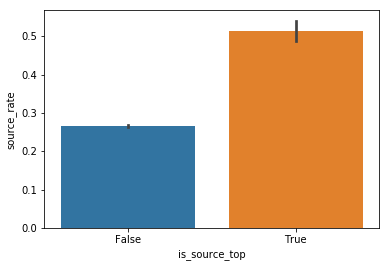

In [163]:
sns.barplot(x="is_source_top", y="source_rate", data=users, estimator=np.mean)

# 4. 基本统计数据上的数值

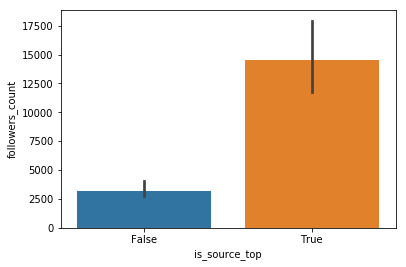

In [156]:
sns.barplot(x="is_source_top", y="followers_count", data=users, estimator=np.mean)

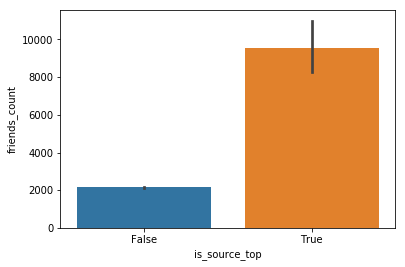

In [158]:
sns.barplot(x="is_source_top", y="friends_count", data=users, estimator=np.mean)

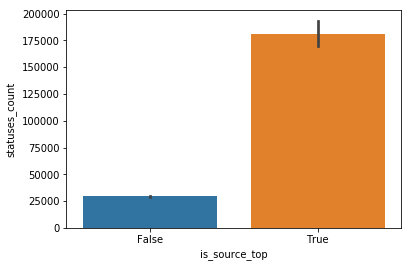

In [159]:
sns.barplot(x="is_source_top", y="statuses_count", data=users, estimator=np.mean)

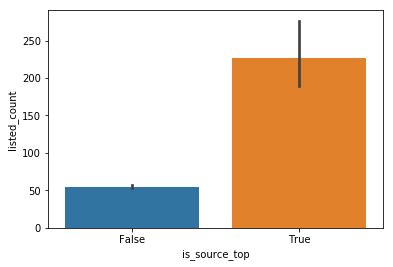

In [160]:
sns.barplot(x="is_source_top", y="listed_count", data=users, estimator=np.mean)

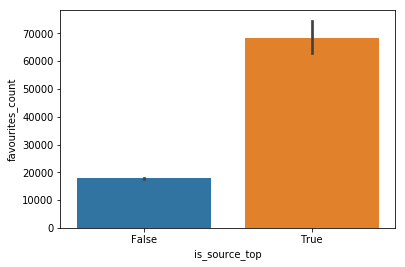

In [162]:
sns.barplot(x="is_source_top", y="favourites_count", data=users, estimator=np.mean)

# 5. CI与source的关系

In [22]:
f_labels = ["FAKE", "BIAS", "LEFT", "LEFTCENTER", "CENTER", "RIGHTCENTER", "RIGHT"]

In [23]:
node_map = json.load(open("disk/node_map.json"))

FAKE ...
BIAS ...
LEFT ...
LEFTCENTER ...
CENTER ...
RIGHTCENTER ...
RIGHT ...


{'FAKE': 346,
 'BIAS': 349,
 'LEFT': 248,
 'LEFTCENTER': 162,
 'CENTER': 159,
 'RIGHTCENTER': 151,
 'RIGHT': 241}

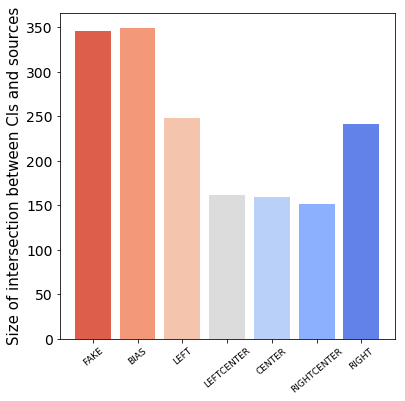

In [189]:
pea_source_cnt_CI_rank = {}
spe_source_cnt_CI_rank = {}
pea_source_cnt_CI_value = {}
spe_source_cnt_CI_value = {}

pea_first_cnt_CI_rank = {}
spe_first_cnt_CI_rank = {}
pea_first_cnt_CI_value = {}
spe_first_cnt_CI_value = {}

top_num = 1000

len_intersection = {}

for label in f_labels:
    print(label, "...")
    CI_rst = np.load("data/CI_rst/CI_out_{}.npy".format(label))
    CI_rank_rst = CI_rst[0][:top_num]
    # print(CI_rank_rst)
    CI_values_rst = CI_rst[1]
    
    CI_index = []
    CI_rank_values = []
    CI_values = []

    users = pd.read_csv("data/users_{}.csv".format(label), dtype=str, nrows=top_num)
    users = users.astype({"cnt": int, "source_cnt": int, "first_cnt": int, 
                          "source_rate": float, "first_rate": float, "first_source_rate": float})
    users = users.set_index("user_id")
    # print(users)
    
    set_CI_users = set(CI_rank_rst)
    set_source_users = set()
    
    for user_id, row in users.iterrows():
        node_id = node_map[user_id]
        set_source_users.add(node_id)
        try:
            i = CI_rank_rst.index(node_id)
            rank = top_num - i
        except ValueError as e:
            rank = 0

        val = CI_values_rst[node_id]
        # print("->", user_id, rank, val)
        CI_index.append(user_id)
        CI_rank_values.append(rank)
        CI_values.append(val)

    len_intersection[label] = len(set_CI_users & set_source_users)
        
    CI_rank = pd.Series(CI_rank_values, index=CI_index)
    CI_values = pd.Series(CI_values, index=CI_index)
    users["CI_rank"] = pd.Series(CI_rank)
    users["CI_values"] = pd.Series(CI_values)
    
    source_CI = pd.DataFrame({
                              "CI_rank": users["CI_rank"],
                              "CI_values": users["CI_values"],
                              "cnt": users["cnt"],
                              "source_cnt": users["source_cnt"],
                              "first_cnt": users["first_cnt"],
                              "source_rate": users["source_rate"]}
                            )
    
#     print("pearson ~")
    cor = source_CI.corr(method="pearson")
#     display(cor)
    pea_source_cnt_CI_rank[label] = cor.source_cnt["CI_rank"]
    pea_source_cnt_CI_value[label] = cor.source_cnt["CI_values"]
    
#     print("spearman ~")
    cor = source_CI.corr(method="spearman")
#     display(cor)
    spe_source_cnt_CI_rank[label] = cor.source_cnt["CI_rank"]
    spe_source_cnt_CI_value[label] = cor.source_cnt["CI_values"]
    
#     print("pearson ~")
    cor = source_CI.corr(method="pearson")
#     display(cor)
    pea_first_cnt_CI_rank[label] = cor.first_cnt["CI_rank"]
    pea_first_cnt_CI_value[label] = cor.first_cnt["CI_values"]
    
#     print("spearman ~")
    cor = source_CI.corr(method="spearman")
#     display(cor)
    spe_first_cnt_CI_rank[label] = cor.first_cnt["CI_rank"]
    spe_first_cnt_CI_value[label] = cor.first_cnt["CI_values"]
    
def plot_corr(cor):
    display(cor)
    plt.figure(figsize=(6, 6))
    x = range(len(f_labels))
    for i in x:
        plt.bar(i, cor[f_labels[i]], color=sns.color_palette("coolwarm", 7)[6-i])
    plt.xticks(x, f_labels)
#     plt.xlabel('Only IRA', fontsize=15)
    plt.ylabel('Size of intersection between CIs and sources', fontsize=15)
    plt.xticks(fontsize=9, rotation=40); plt.yticks(fontsize=14)
    plt.savefig("fig/size-of-intersection500.pdf", dpi=300, bbox_inches='tight')
    plt.show()
    plt.tight_layout()
    plt.close()
    
# plot_corr(pea_source_cnt_CI_rank)
# plot_corr(spe_source_cnt_CI_rank)
# plot_corr(pea_source_cnt_CI_value)
# plot_corr(spe_source_cnt_CI_value)

plot_corr(len_intersection)

# # plot_corr(pea_source_cnt_CI_rank)
# plot_corr(spe_first_cnt_CI_rank)
# # plot_corr(pea_source_cnt_CI_value)
# plot_corr(spe_first_cnt_CI_value)


/home/alex/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


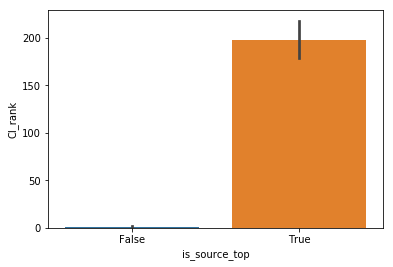

In [300]:
sns.barplot(x="is_source_top", y="CI_rank", data=users, estimator=np.mean)

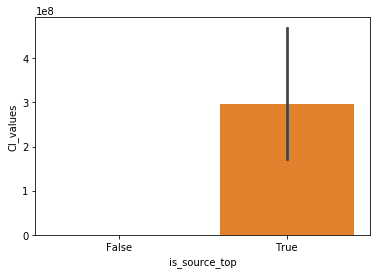

In [301]:
sns.barplot(x="is_source_top", y="CI_values", data=users, estimator=np.mean)

In [302]:
source_CI = pd.DataFrame({"CI_rank": users["CI_rank"],
                          "CI_values": users["CI_values"],
                          "is_source": users["is_source"],
                          "source_rate": users["source_rate"]})

In [303]:
source_CI.corr()

,CI_rank,CI_values,is_source,source_rate
CI_rank,1.000000,0.257452,0.488942,0.082084
CI_values,0.257452,1.000000,0.328691,0.016954
is_source,0.488942,0.328691,1.000000,0.109910
source_rate,0.082084,0.016954,0.109910,1.000000


In [304]:
# 顺便这里把IRA做一下

ira_users = users.loc[ira_tweets["user_id"].unique()]

In [305]:
ira_users[ira_users["CI_rank"] > 0]

,is_fake,is_first,is_source,source_rate,first_rate,first_source_rate,code,contributors_enabled,created_at,default_profile,...,statuses_count,time_zone,translator_type,url,utc_offset,verified,withheld_in_countries,is_source_top,CI_rank,CI_values
4437444442,5,0,5,1.000000,0.000000,0.000000,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,305,3486230
4272870988,23,3,22,0.956522,0.130435,0.136364,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,606,19000410
4224729994,18,9,17,0.944444,0.500000,0.529412,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,717,45916704
4289431230,5,0,5,1.000000,0.000000,0.000000,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,342,4104793
4355797094,6,1,6,1.000000,0.166667,0.166667,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,320,3662592
789266125485998080,223,29,223,1.000000,0.130045,0.130045,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,92,1299480
4311371968,11,2,10,0.909091,0.181818,0.200000,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,385,5149200


In [291]:
ira_users.describe()

,is_fake,is_first,is_source,source_rate,first_rate,first_source_rate,code,favourites_count,followers_count,friends_count,id,listed_count,statuses_count,time_zone,utc_offset,CI_rank,CI_values
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.0,0.0,0.0,0.0,9.200000e+01,0.0,0.0,0.0,0.0,92.00000,9.200000e+01
mean,17.706522,3.739130,9.336957,0.537902,0.174323,inf,63.0,NaN,NaN,NaN,4.026391e+16,NaN,NaN,NaN,NaN,15.50000,2.367963e+06
std,40.342092,8.527743,26.549261,0.369736,0.242284,NaN,0.0,NaN,NaN,NaN,1.690001e+17,NaN,NaN,NaN,NaN,84.76775,1.469957e+07
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.0,NaN,NaN,NaN,1.513801e+09,NaN,NaN,NaN,NaN,0.00000,0.000000e+00
25%,1.000000,0.000000,1.000000,0.279720,0.000000,0.000000,63.0,NaN,NaN,NaN,1.671006e+09,NaN,NaN,NaN,NaN,0.00000,0.000000e+00
50%,4.000000,1.000000,2.000000,0.500000,0.102302,0.183333,63.0,NaN,NaN,NaN,2.492015e+09,NaN,NaN,NaN,NaN,0.00000,0.000000e+00
75%,15.500000,2.250000,7.000000,1.000000,0.254332,0.582543,63.0,NaN,NaN,NaN,2.932521e+09,NaN,NaN,NaN,NaN,0.00000,0.000000e+00
max,228.000000,54.000000,223.000000,1.000000,1.000000,inf,63.0,NaN,NaN,NaN,7.892661e+17,NaN,NaN,NaN,NaN,620.00000,1.295445e+08


In [293]:
## 明天把数据都补充上！这下就更牛逼了！

___
# Analysis of results of all_tweets.py

In [5]:
from all_tweets import ALL_TWEET

Lebron = ALL_TWEET()
Lebron.load_all_tweets()
all_tweets = Lebron.tweets_csv

loading all tweets_csv ...
finished!


In [6]:
all_tweets.head()

,URL,dt,hostname,is_IRA,is_first,is_source,media_type,retweeted_id,tweet_id,user_id
0,http://www.newsweek.com/vladimir-putin-sidney-...,2016-10-10 18:49:57,newsweek.com,0,1,1,5,0,785628468746727424,215207998
1,http://www.newsweek.com/vladimir-putin-sidney-...,2016-10-10 18:50:09,newsweek.com,0,0,0,5,785628468746727424,785628515991302144,20634939
2,http://www.newsweek.com/vladimir-putin-sidney-...,2016-10-10 18:50:10,newsweek.com,0,0,0,5,785628468746727424,785628519703326722,26378513
3,http://www.newsweek.com/vladimir-putin-sidney-...,2016-10-10 18:50:16,newsweek.com,0,0,0,5,785628468746727424,785628546114859008,445966346
4,http://www.newsweek.com/vladimir-putin-sidney-...,2016-10-10 18:50:23,newsweek.com,0,0,0,5,785628468746727424,785628574388621312,754104364164345860


In [4]:
map_labels = {
    "0": "fake",
    "1": "extreme bias (right)",
    "2": "right",
    "3": "right leaning",
    "4": "center",
    "5": "left leaning",
    "6": "left",
    "7": "extreme bias (left)"
}

5    0.248078
4    0.202089
6    0.138042
2    0.132537
1    0.129954
0    0.096542
3    0.033987
7    0.018772
Name: media_type, dtype: float64

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ]),
 <a list of 7 Text yticklabel objects>)

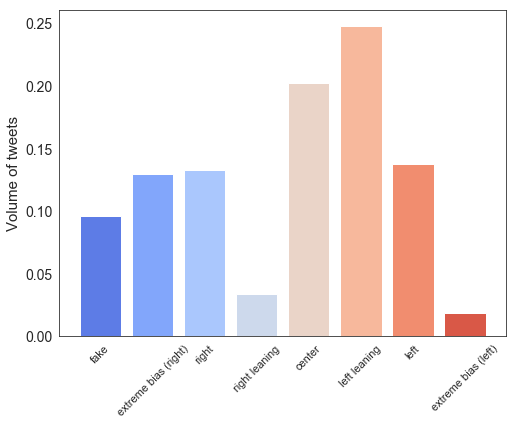

In [11]:
sns.set_style("white")
sns.set_palette("coolwarm", n_colors=8)

media_type_counts = all_tweets["media_type"].value_counts(normalize=True)
display(media_type_counts)
plt.figure(figsize=(8, 6))
x = range(len(media_type_counts))

for i in x:
    plt.bar(i, media_type_counts[str(i)])
    
plt.xticks(x, [map_labels[k] for i, k in enumerate(map_labels)])
# plt.xlabel("IRAs", fontsize=18)
plt.ylabel('Volume of tweets', fontsize=15)
plt.xticks(fontsize=11, rotation=45)
plt.yticks(fontsize=14)

# plt.savefig("fig/size-of-intersection500.pdf", dpi=300, bbox_inches='tight')

## 遵循hernan的指示，算一下CI_clique

In [42]:
def get_num_of_retweeted_for_user(uid):
    """
    uid作为源的次数及被转总次数
    """
    # print(uid)
    tids = all_tweets[(all_tweets.user_id==uid) & (all_tweets.media_type=="0")].tweet_id
    num_of_retweets = [retweeted_count[tid] for tid in tids]
    _sum = sum(num_of_retweets)
    return len(tids), _sum

cnt = 0
with open("data/CI_clique.txt", "w") as f:
    for uid in all_users[all_users.fake_source>0].index:
        cnt += 1
        rst = get_num_of_retweeted_for_user(uid)
        print(rst[0], rst[1], file=f, sep=",")
        if cnt % 10 == 0:
            print(cnt)
            


10
20


KeyboardInterrupt: 

指示结束

----

In [23]:
IRA_tweets = all_tweets[all_tweets["is_IRA"]>0]

## IRA作为源，或者参与到其中的消息是否更加爆炸？

In [13]:
IRA_as_source = IRA_tweets[IRA_tweets.is_source == 1]

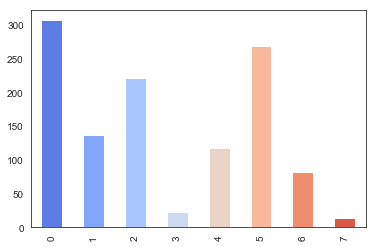

In [14]:
pd.Series(IRA_as_source.media_type.value_counts(), index=[str(i) for i in range(8)]).plot("bar")

In [15]:
tweets_count = all_tweets.groupby("retweeted_id").count().tweet_id

In [16]:
import sys, traceback

dict_media_len_ret = defaultdict(int)

for _, row in tqdm(IRA_as_source.iterrows()):
    try:
        tweet_id = row["tweet_id"]
        c = int(tweets_count[tweets_count.index==tweet_id].values)
    except:
        c = 0
        # traceback.print_exc()
        
    dict_media_len_ret[row.media_type] += c

1167it [03:42,  5.28it/s]


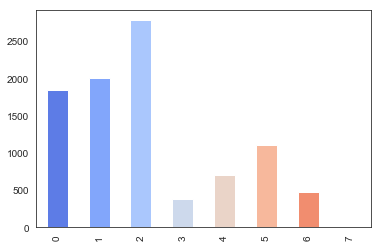

In [17]:
pd.Series(dict_media_len_ret, index=[str(i) for i in range(8)]).plot("bar")

In [18]:
URL_count = all_tweets.URL.value_counts()

## IRA所讲的故事是不是爆炸性的故事？ 

7345it [00:01, 7173.16it/s]


0    351.173469
1    944.808525
2    588.846596
3    572.043689
4    237.193947
5    544.730479
6    235.702247
7    107.436170
dtype: float64

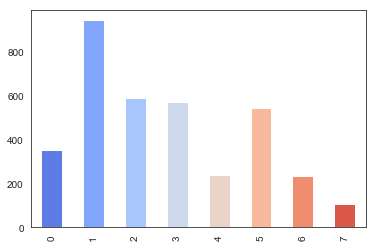

0     412980
1    1440833
2     717804
3     117841
4     384017
5     432516
6     167820
7      10099
dtype: int64

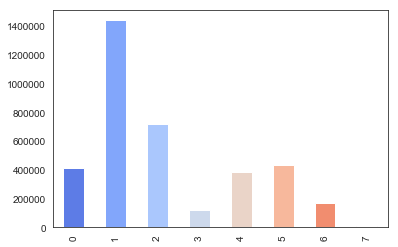

In [19]:
dict_media_len_ret = defaultdict(list)

for _, row in tqdm(IRA_tweets.iterrows()):
    c = int(URL_count[row.URL])
    dict_media_len_ret[row.media_type].append(c)

_ave = {k: sum(v) / len(v) for k, v in dict_media_len_ret.items()}
_sum = {k: sum(v) for k, v in dict_media_len_ret.items()}

d = pd.Series(_ave, index=[str(i) for i in range(8)])
display(d)
d.plot("bar")
plt.show()
plt.close()

d = pd.Series(_sum, index=[str(i) for i in range(8)])
display(d)
d.plot("bar")
plt.show()
plt.close()

7345it [00:00, 13289.07it/s]


0    216.328990
1    924.779412
2    374.208145
3    250.130435
4    483.034188
5     97.679104
6    253.585366
7    109.384615
dtype: float64

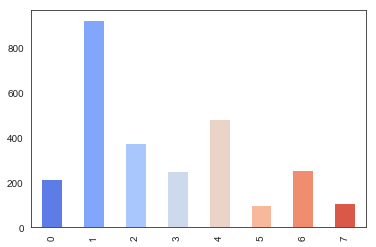

0     66413
1    125770
2     82700
3      5753
4     56515
5     26178
6     20794
7      1422
dtype: int64

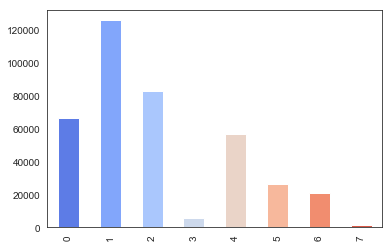

In [20]:
dict_media_len_ret = defaultdict(list)

for _, row in tqdm(IRA_tweets.iterrows()):
    if row.is_source == 1:
        c = int(URL_count[row.URL])
        dict_media_len_ret[row.media_type].append(c)

_ave = {k: sum(v) / len(v) for k, v in dict_media_len_ret.items()}
_sum = {k: sum(v) for k, v in dict_media_len_ret.items()}

d = pd.Series(_ave, index=[str(i) for i in range(8)])
display(d)
d.plot("bar")
plt.show()
plt.close()

d = pd.Series(_sum, index=[str(i) for i in range(8)])
display(d)
d.plot("bar")
plt.show()
plt.close()

为了作为对比，所有的URL又是什么情况呢？

## Loading all-users.csv ... ...

!! Already coded in the all_tweets.py for making all-users.csv

In [24]:
def load_all_users():
    users = pd.read_csv("data/all-users.csv", index_col="user_id", dtype={"user_id": str})

    # change the type
    f_labels = [map_labels[k] for k in map_labels]
    users = users.astype({"is_IRA": int})

    for label in f_labels:
        users = users.astype({label: int, label + "_source": int, label + "_first": int, 
                              label + "_source_rate": float, label + "_first_rate": float,
                              label + "_first_source_rate": float,})
    return users

In [25]:
all_users = load_all_users()

In [16]:
# user_id > screen_name

user_info = pd.DataFrame([json.loads(line.strip()) for line in open("data/user-top-info.json")])
user_info = user_info.rename(columns={'id_str': 'user_id'})
user_info = user_info.set_index("user_id")
map_user_name = []
for line in open("data/user-top-info.json"):
    d = json.loads(line.strip())
    try:
        dat = {"user_id": d["id_str"], "name": d["name"]}
    except:
        dat = {"user_id": d["id_str"], "name": d["message"]}
    map_user_name.append(dat)
    
map_user_name = pd.DataFrame(map_user_name).set_index("user_id")

FileNotFoundError: [Errno 2] No such file or directory: 'data/user-top-info.json'

In [307]:
# Show the top sources !!!

for label in f_labels:
    print(label)
    tmp = users.sort_values(label + "_source", ascending=False).head(25)
    tmp = tmp.join(map_user_name)
#     display(tmp)
#     display(tmp[[label + "_source", "name"]].sort_values(label + "_source", ascending=False))
    

FAKE
BIAS
LEFT
LEFTCENTER
CENTER
RIGHTCENTER
RIGHT


## Are IRAs the sources of fake news or influencers? 

In [23]:
len(IRA_tweets)

7345

In [24]:
IRA_users = all_users[all_users.is_IRA > 0]
len(IRA_users)

266

In [25]:
def get_big_table(_users):
    big_table = []

    for i in range(len(map_labels)):
        lab = map_labels[str(i)]
        volume = _users[lab].sum()
        source_volume = _users[lab + "_source"].sum()
        first_volume = _users[lab + "_first"].sum()
        source_rate = _users[_users[lab + "_source_rate"] > 0][lab + "_source_rate"].mean()
        first_rate = _users[_users[lab + "_first_rate"] > 0][lab + "_first_rate"].mean()
        user_volume = len(_users[_users[lab]>0])
        source_user_volume = len(_users[_users[lab + "_source"]>0])
        d = dict(Nt=volume, Ns=source_volume, Nu=user_volume,
                 Rs=source_rate, Rf=first_rate, Nsu=source_user_volume, Nf=first_volume)
        big_table.append(d)

    big_table = pd.DataFrame(big_table, index=[map_labels[k] for k in map_labels])
    big_table["Pt"] = big_table["Nt"] / big_table["Nt"].sum()
    big_table["Ps"] = big_table["Ns"] / big_table["Ns"].sum()
    big_table["Ns/Nt"] = big_table["Ns"] / big_table["Nt"]
    big_table["Nf/Nt"] = big_table["Nf"] / big_table["Nt"]
    big_table["Nt/Nu"] = big_table["Nt"] / big_table["Nu"]
    big_table["Ns/Nsu"] = big_table["Ns"] / big_table["Nsu"]

    big_table = big_table[["Nt", "Pt", "Ns", "Ns/Nt", "Ps", "Rs", "Nu", "Nt/Nu", "Nsu", "Ns/Nsu"]]
#     big_table = big_table[["Nt", "Pt", "Ns", "Ps", "Ns/Nt", "Nu", "Rs", "Rf", "Nt/Nu"]]
    return big_table

In [26]:
BT = get_big_table(IRA_users)
BT.to_csv("data/IRA_BT.csv", float_format="%.2f")
BT

,Nt,Pt,Ns,Ns/Nt,Ps,Rs,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,1206,0.155312,310,0.257048,0.218618,0.685710,72,16.750000,25,12.400000
extreme bias (right),1561,0.201030,137,0.087764,0.096615,0.651450,99,15.767677,30,4.566667
right,1262,0.162524,226,0.179081,0.159379,0.784600,104,12.134615,38,5.947368
right leaning,222,0.028590,36,0.162162,0.025388,1.000000,83,2.674699,12,3.000000
center,1670,0.215068,154,0.092216,0.108604,0.683475,169,9.881657,38,4.052632
left leaning,1012,0.130328,458,0.452569,0.322990,0.865301,174,5.816092,35,13.085714
left,738,0.095042,84,0.113821,0.059238,0.712945,151,4.887417,32,2.625000
extreme bias (left),94,0.012106,13,0.138298,0.009168,0.825000,42,2.238095,10,1.300000


In [27]:
BT.Nt.sum()

7765

In [28]:
BT2 = get_big_table(all_users)
BT2.to_csv("data/all_BT.csv", float_format="%.2f")
BT2

,Nt,Pt,Ns,Ns/Nt,Ps,Rs,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,3315726,0.096542,1135596,0.342488,0.108241,0.659293,214317,15.471129,74731,15.195782
extreme bias (right),4463246,0.129954,1269739,0.284488,0.121027,0.679415,309705,14.411282,106369,11.937115
right,4551965,0.132537,1227784,0.269726,0.117028,0.716079,446395,10.197168,149361,8.220245
right leaning,1167275,0.033987,390182,0.334267,0.037191,0.813689,303709,3.843399,94295,4.137886
center,6940715,0.202089,2151334,0.309959,0.205058,0.754281,1116903,6.214250,290305,7.410599
left leaning,8520196,0.248078,2495257,0.292864,0.237840,0.755830,1384077,6.155868,425107,5.869715
left,4741045,0.138042,1638140,0.345523,0.156142,0.789312,712952,6.649880,244146,6.709674
extreme bias (left),644726,0.018772,183302,0.284310,0.017472,0.797204,103735,6.215125,37672,4.865736


In [65]:
def plot_compare(col_name):
    ax = plt.figure(figsize=(10, 6))
    plt.ylabel(col_name, fontsize=15)
    print(BT[col_name])
    print(BT2[col_name])
    BT[col_name].plot.bar(width=0.3, position=1, color=sns.color_palette("coolwarm", 8)[7], label="IRAs")
    BT2[col_name].plot.bar(width=0.3, position=0, color=sns.color_palette("coolwarm", 8)[0], label="All users")
    
    plt.xlim(-1, 8)
    
#     if col_name == "Ns/Nt":
#         plt.ylim((0, 0.5))
#     if col_name == "Rs":
#         plt.ylim((0, 0.15))
#     if col_name == "Rf":
#         plt.ylim((0, 0.08))
    
    plt.xticks(fontsize=13, rotation=45)

    plt.xlim(-1, 8)

    plt.legend(fontsize=13)

    col_name = col_name.replace("/", "-")
    plt.savefig("fig/{}.pdf".format(col_name), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

fake                    0.155312
extreme bias (right)    0.201030
right                   0.162524
right leaning           0.028590
center                  0.215068
left leaning            0.130328
left                    0.095042
extreme bias (left)     0.012106
Name: Pt, dtype: float64
fake                    0.096542
extreme bias (right)    0.129954
right                   0.132537
right leaning           0.033987
center                  0.202089
left leaning            0.248078
left                    0.138042
extreme bias (left)     0.018772
Name: Pt, dtype: float64


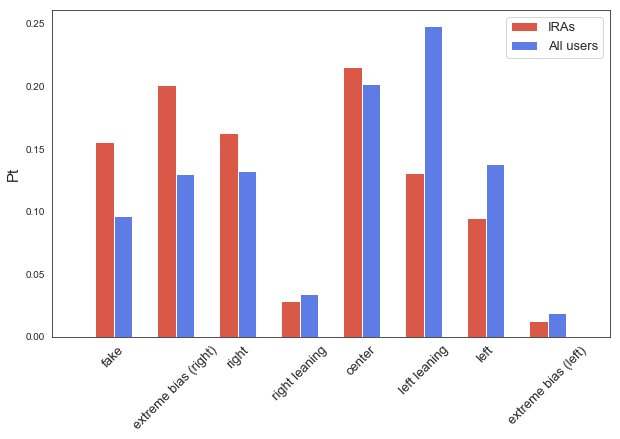

In [66]:
plot_compare("Pt")

fake                    0.218618
extreme bias (right)    0.096615
right                   0.159379
right leaning           0.025388
center                  0.108604
left leaning            0.322990
left                    0.059238
extreme bias (left)     0.009168
Name: Ps, dtype: float64
fake                    0.108241
extreme bias (right)    0.121027
right                   0.117028
right leaning           0.037191
center                  0.205058
left leaning            0.237840
left                    0.156142
extreme bias (left)     0.017472
Name: Ps, dtype: float64


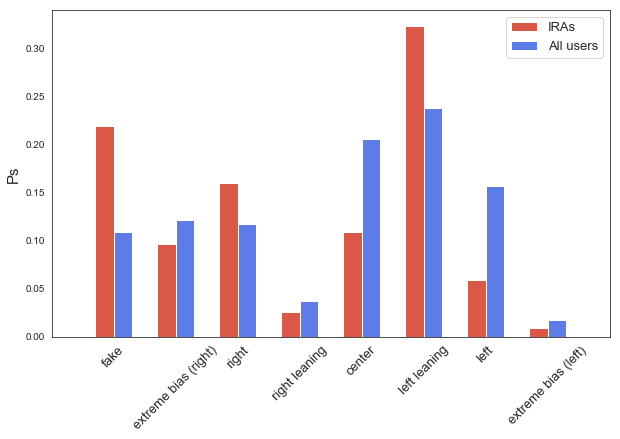

In [67]:
plot_compare("Ps")

fake                    0.685710
extreme bias (right)    0.651450
right                   0.784600
right leaning           1.000000
center                  0.683475
left leaning            0.865301
left                    0.712945
extreme bias (left)     0.825000
Name: Rs, dtype: float64
fake                    0.659293
extreme bias (right)    0.679415
right                   0.716079
right leaning           0.813689
center                  0.754281
left leaning            0.755830
left                    0.789312
extreme bias (left)     0.797204
Name: Rs, dtype: float64


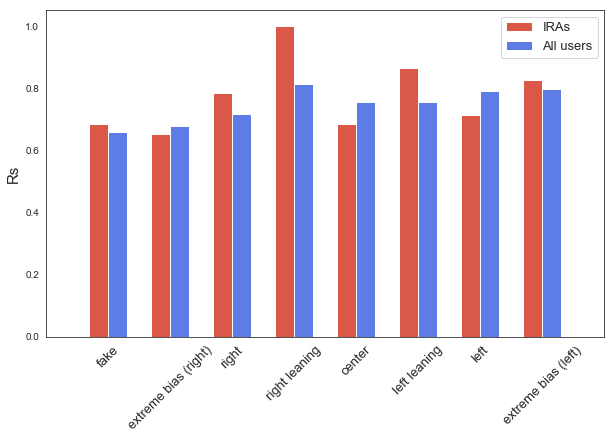

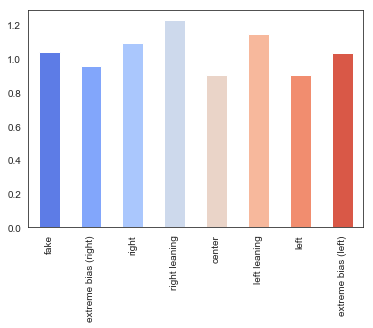

In [68]:
plot_compare("Rs")
(BT["Rs"] / BT2["Rs"]).plot.bar()

fake                    16.750000
extreme bias (right)    15.767677
right                   12.134615
right leaning            2.674699
center                   9.881657
left leaning             5.816092
left                     4.887417
extreme bias (left)      2.238095
Name: Nt/Nu, dtype: float64
fake                    15.471129
extreme bias (right)    14.411282
right                   10.197168
right leaning            3.843399
center                   6.214250
left leaning             6.155868
left                     6.649880
extreme bias (left)      6.215125
Name: Nt/Nu, dtype: float64


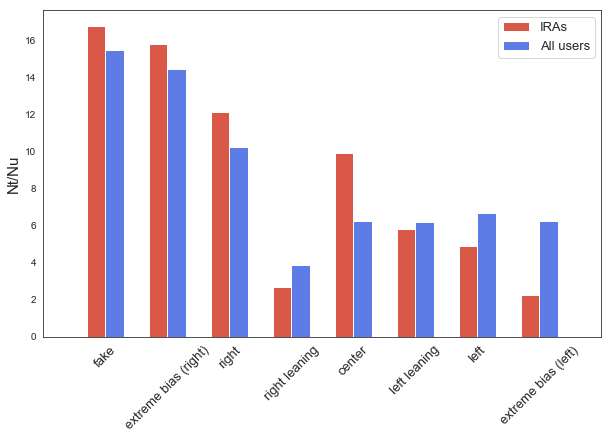

In [69]:
plot_compare("Nt/Nu")

fake                    12.400000
extreme bias (right)     4.566667
right                    5.947368
right leaning            3.000000
center                   4.052632
left leaning            13.085714
left                     2.625000
extreme bias (left)      1.300000
Name: Ns/Nsu, dtype: float64
fake                    15.195782
extreme bias (right)    11.937115
right                    8.220245
right leaning            4.137886
center                   7.410599
left leaning             5.869715
left                     6.709674
extreme bias (left)      4.865736
Name: Ns/Nsu, dtype: float64


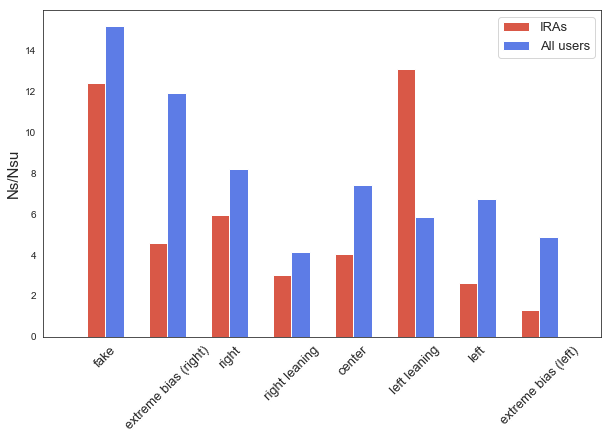

In [70]:
plot_compare("Ns/Nsu")

## IRAs as sources

1. 看看每个用户发布的量
2. 找到top sources看看交集

结论：IRA从量上来看伪装非常普通的用户！

用户发帖量的分布

fake


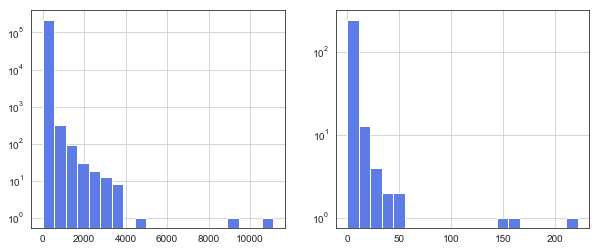

extreme bias (right)
right
right leaning
center
left leaning
left
extreme bias (left)


In [34]:
sns.set_style("white")

for i in range(len(map_labels)):
    lab = map_labels[str(i)]
    print(lab)
    
    plt.figure(figsize=(10, 4))
    ax = plt.subplot(121)
    _users = all_users[all_users[lab] > 0]
    _users[lab].hist(ax=ax, bins=20)
    # display(all_users[lab + "_source"].describe())
    # USER_TABLE[lab] = _users[lab].describe()
    plt.yscale("log")
#     plt.xscale("log")
    
    ax = plt.subplot(122)
    IRA_users[lab].hist(ax=ax, bins=20)
    # IRA_USER_TABLE[lab] = IRA_users[lab].describe()
    plt.yscale("log")
    
    if lab == "fake":
        plt.show()
    plt.close()

用户发source tweets的分布

fake


NameError: name 'USER_TABLE' is not defined

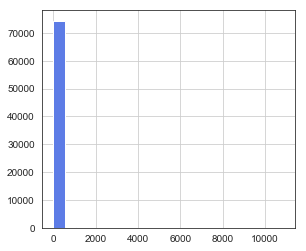

In [35]:
# USER_TABLE = {}

for i in range(len(map_labels)):
    lab = map_labels[str(i)]
    print(lab)
    plt.figure(figsize=(10, 4))
    ax = plt.subplot(121)
    _users = all_users[all_users[lab + "_source"] > 0]
    _users[lab + "_source"].hist(ax=ax, bins=20)
    # display(all_users[lab + "_source"].describe())
    USER_TABLE[lab] = _users[lab + "_source"].describe()
    plt.yscale("log")
    
    ax = plt.subplot(122)
    IRA_users[lab + "_source"].hist(ax=ax, bins=20)
    plt.yscale("log")
    if lab == "fake":
        plt.show()
    plt.close()

    
# USER_TABLE = pd.DataFrame(USER_TABLE).transpose()
# USER_TABLE

## 从量的角度看IRA的确不高，甚至低于一般的用户

In [36]:
set_IRAs_users = set()

for user_id, row in IRA_users.iterrows():
    set_IRAs_users.add(user_id)
    
# print(len(set_IRAs_users))

In [38]:
top_num = 1000

for i in range(len(map_labels)):
    lab = map_labels[str(i)]
    top_sources = set(all_users[lab].sort_values(ascending=False).head(top_num).index)
    # print(top_sources)
    len_intersection = len(top_sources & set_IRAs_users)
    print(lab, len_intersection)

fake 0
extreme bias (right) 0
right 0
right leaning 0
center 0
left leaning 0
left 0
extreme bias (left) 0


In [39]:
top_num = 1000

for i in range(len(map_labels)):
    lab = map_labels[str(i)]
    top_sources = set(all_users[lab + "_source"].sort_values(ascending=False).head(top_num).index)
    # print(top_sources)
    len_intersection = len(top_sources & set_IRAs_users)
    print(lab, len_intersection)

fake 1
extreme bias (right) 0
right 0
right leaning 0
center 0
left leaning 0
left 0
extreme bias (left) 0


## IRAs as influencers

In [40]:
import graph_tool.all as gt

In [41]:
def build_CI_rank(graph_file):
    g = gt.load_graph(graph_file)
    user_CI = {g.vp.id[v]: g.vp.CI_both[v] for v in g.vertices()}
    st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)
    return user_CI, st_user_CI

In [42]:
top_num = 10000

len_intersection = {}
dict_CI_value = {}
f_labels = [map_labels[str(i)] for i in range(8)]

for label in f_labels:
    print(label, "...")
    user_CI, sort_user_CI = build_CI_rank("data/network/network_{}.gt".format(label))    
    set_CI_users = set([d[0] for d in sort_user_CI[:top_num]])
    set_source_users = set()
    
    IRA_CI_value = []
    for user_id, row in IRA_users.iterrows():
        set_source_users.add(user_id)
        try:
            IRA_CI_value.append(user_CI[user_id])
        except:
            pass
    
    len_intersection[label] = len(set_CI_users & set_source_users)
    print("参与人数：", len(IRA_CI_value), len(sort_user_CI))
    IRA_CI_value = int(np.array(IRA_CI_value).mean())
    all_CI_value = int(np.array([[d for d in user_CI.values()]]).mean())
    
    dict_CI_value[label] = {"IRA": IRA_CI_value, "All users":all_CI_value}


fake ...
参与人数： 67 186540
extreme bias (right) ...
参与人数： 96 267240
right ...
参与人数： 92 379645
right leaning ...
参与人数： 80 252879
center ...
参与人数： 162 950205
left leaning ...
参与人数： 162 1170324
left ...
参与人数： 141 582360
extreme bias (left) ...
参与人数： 35 83305


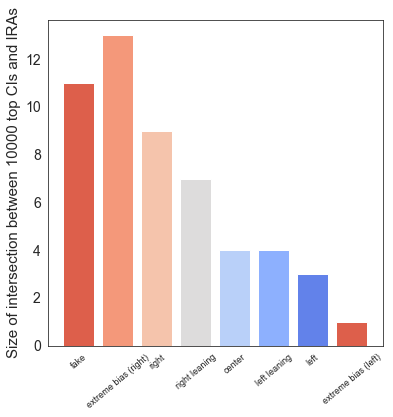

,All users,IRA
fake,634121,1901629
extreme bias (right),565747,2626286
right,494225,2543463
right leaning,35181,2342
center,462088,56719
left leaning,407506,117639
left,229852,32780
extreme bias (left),57923,0


In [30]:
def plot_corr(cor):
    # display(cor)
    plt.figure(figsize=(6, 6))
    x = range(len(f_labels))
    for i in x:
        plt.bar(i, cor[f_labels[i]], color=sns.color_palette("coolwarm", 7)[6-i])
    plt.xticks(x, f_labels)
#     plt.xlabel('Only IRA', fontsize=15)
    plt.ylabel('Size of intersection between {} top CIs and IRAs'.format(top_num), fontsize=15)
    plt.xticks(fontsize=9, rotation=40); plt.yticks(fontsize=14)
    plt.savefig("fig/size-of-intersection{}.pdf".format(top_num), dpi=300, bbox_inches='tight')
    plt.show()
    plt.tight_layout()
    plt.close()
    
plot_corr(len_intersection)

compare_CI_value = pd.DataFrame(dict_CI_value).transpose()
compare_CI_value

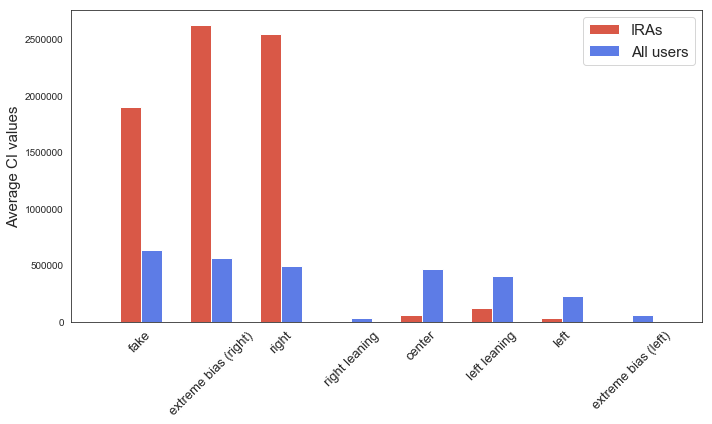

In [31]:
ax = plt.figure(figsize=(10, 6))
plt.ylabel("Average CI values", fontsize=15)
compare_CI_value["IRA"].plot.bar(width=0.3, position=1, color=sns.color_palette("coolwarm", 8)[7], label="IRAs")
compare_CI_value["All users"].plot.bar(width=0.3, position=0, color=sns.color_palette("coolwarm", 8)[0], label="All users")
plt.xticks(fontsize=13, rotation=45)

plt.xlim(-1, 8)
plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig("fig/CI.pdf", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [73]:
IRA_users_csv = pd.read_csv("data/ira_users_csv_hashed.csv")

In [74]:
key_IRA_users = [
    "4272870988",
    "4224729994",
    "4437444442",
    "3990577513",
    "4355797094",
    "48eb1158782d382f9f9bb2c3d99f118bd88eab0bf8ef4f6f4d44494c989ad766" # "4209684039",
]

from fake_identify import Are_you_IRA

putin = Are_you_IRA()

# print(putin._map)

for k, v in putin._map.items():
    if v in key_IRA_users:
        print(k, v)

In [75]:
IRA_users_csv[IRA_users_csv.userid.isin(key_IRA_users)]

,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,account_language
11,3990577513,Tea Party News,tpartynews,NaN,NaN,NaN,21498,22407,2015-10-23,en
414,4355797094,Texas Lone Star,SouthLoneStar,"Texas, USA",Proud TEXAN and AMERICAN patriot #2a #prolife ...,NaN,53999,49272,2015-11-25,en
1433,4437444442,Pamela Kealer,PamelaKealer13,"Texas, USA",NaN,NaN,10226,10184,2015-12-10,en
2642,4224729994,Tennessee,TEN_GOP,NaN,Unofficial Twitter of Tennessee Republicans. C...,NaN,147767,74664,2015-11-19,en
2791,48eb1158782d382f9f9bb2c3d99f118bd88eab0bf8ef4f...,48eb1158782d382f9f9bb2c3d99f118bd88eab0bf8ef4f...,48eb1158782d382f9f9bb2c3d99f118bd88eab0bf8ef4f...,NaN,A silent American patriot who was awoken by Do...,NaN,2688,1377,2015-11-17,en
3387,4272870988,Pamela Moore,Pamela_Moore13,"Texas, USA",Southern. Conservative. Pro God. Anti Racism,NaN,72121,42080,2015-11-25,en


## IRAs as supporters 

In [ ]:
from collections import Counter
sns.set_style("white")
sns.color_palette("RdBu", n_colors=7)

count = Counter(first_opinion)
print(count)

label = ["pro-hillary", "pro-trump"]
plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.bar(1, count[0], color=sns.color_palette("RdBu")[5], width=0.2)
plt.bar(1.5, count[1], color=sns.color_palette("RdBu")[0], width=0.2)
label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 1.5], label)
plt.xlabel('First source', fontsize=15)
plt.ylabel('Number of tweets', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

count = Counter(staters_opinion)
print(count)

plt.subplot(132)
plt.bar(1, count[0], color=sns.color_palette("RdBu")[5], width=0.2)
plt.bar(1.5, count[1], color=sns.color_palette("RdBu")[0], width=0.2)
label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 1.5], label)
plt.xlabel('source', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

count = Counter(other_opinion)
print(count)

plt.subplot(133)
plt.bar(1, count[0], color=sns.color_palette("RdBu")[5], width=0.2)
plt.bar(1.5, count[1], color=sns.color_palette("RdBu")[0], width=0.2)
label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 1.5], label)
plt.xlabel('non-source', fontsize=15)
# plt.ylabel('N of fake sources', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

plt.savefig("fig/support.pdf", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Making URL 

In [117]:
URL_counts = all_tweets.URL.value_counts()

In [32]:
# cnt = 0

set_URL = set()

for URL in URL_counts.index:
    # print(URL)
    if URL.endswith("/"):
        URL = URL[:-1]
    if URL in set_URL:
        print(URL)
    set_URL.add(URL)
        
print(len(set_URL))

NameError: name 'URL_counts' is not defined

In [125]:
len(URL_counts)

2524061

## 网络分析

分析每种媒体网络中IRA的节点数量，相关边的数量，平均度，最大度等。

In [166]:
from fake_identify import Are_you_IRA

putin = Are_you_IRA()


def get_G_char(g_file):
    print(g_file, "...")
    G = nx.read_gpickle(g_file)
    
    n_nodes = G.number_of_nodes()
    n_edges = G.number_of_edges()
    k = G.number_of_edges() / G.number_of_nodes()

    out_d = pd.Series([k[1] for k in G.out_degree()])
    ave_out_d = out_d.std() / k
    max_out_d = max(out_d)

    in_d = pd.Series([k[1] for k in G.in_degree()])
    ave_in_d = in_d.std() / k
    max_in_d = max(in_d)

    rst = {
        "N nodes": n_nodes,
        "N edges": n_edges,
        "<k>": k,
        "std(k_out) / <k>": ave_out_d,
        "std(k_in) / <k>": ave_in_d,
        "max(k_out)": max_out_d,
        "max(k_in)": max_in_d,
    }        
    
    return rst


def get_G_char_IRA(g_file):
    print(g_file, "...")
    G = nx.read_gpickle(g_file)
    
    nodes = [uid for uid in putin.IRA_user_set if G.has_node(uid)]
    
    n_nodes = len(nodes)
    out_d = pd.Series([G.out_degree(n) for n in nodes])
    ave_k_out = out_d.sum() / n_nodes
    std_k_out = out_d.std() / ave_k_out
    max_out_d = max(out_d)

    in_d = pd.Series([G.in_degree(n) for n in nodes])
    ave_k_in = in_d.sum() / n_nodes
    std_k_in = in_d.std() / ave_k_in
    max_in_d = max(in_d)
    
    rst = {
        "N nodes": n_nodes,
        "<k_out>": ave_k_out,
        "<k_in>": ave_k_in,
        "std(k_out) / <k_out>": ave_k_out,
        "std(k_in) / <k_in>": ave_k_in,
        "max(k_out)": max_out_d,
        "max(k_in)": max_in_d,
    } 
    return rst


In [152]:
networks_char = {}

for i in range(len(map_labels)):
    category = map_labels[str(i)]
    rst = get_G_char("disk/network_{}.gpickle".format(category))
    networks_char[category] = rst

disk/network_fake.gpickle ...
disk/network_extreme bias (right).gpickle ...
disk/network_right.gpickle ...
disk/network_right leaning.gpickle ...
disk/network_center.gpickle ...
disk/network_left leaning.gpickle ...
disk/network_left.gpickle ...
disk/network_extreme bias (left).gpickle ...


In [153]:
networks_char = pd.DataFrame(networks_char).transpose()
networks_char = networks_char[["N nodes", "N edges", "<k>", "std(k_out) / <k>", "std(k_in) / <k>", "max(k_out)", "max(k_in)"]]
networks_char

,N nodes,N edges,<k>,std(k_out) / <k>,std(k_in) / <k>,max(k_out),max(k_in)
fake,187581.0,1328109.0,7.080189,32.504332,2.519126,45305.0,1234.0
extreme bias (right),268065.0,1904334.0,7.104001,38.048120,2.780742,60622.0,642.0
right,381854.0,2130544.0,5.579473,48.089533,2.772111,87216.0,546.0
right leaning,254212.0,631148.0,2.482762,50.028980,1.821710,38981.0,147.0
center,975312.0,2960757.0,3.035702,122.764473,2.786870,257559.0,551.0
left leaning,1183403.0,4284667.0,3.620632,74.030897,3.498212,172026.0,913.0
left,587553.0,2077901.0,3.536534,50.410517,3.593570,59749.0,797.0
extreme bias (left),83669.0,299408.0,3.578482,33.826937,2.517140,23208.0,659.0


In [167]:
networks_char = {}

for i in range(len(map_labels)):
    category = map_labels[str(i)]
    rst = get_G_char_IRA("disk/network_{}.gpickle".format(category))
    networks_char[category] = rst

disk/network_fake.gpickle ...
disk/network_extreme bias (right).gpickle ...
disk/network_right.gpickle ...
disk/network_right leaning.gpickle ...
disk/network_center.gpickle ...
disk/network_left leaning.gpickle ...
disk/network_left.gpickle ...
disk/network_extreme bias (left).gpickle ...


/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in double_scalars


In [168]:
networks_char = pd.DataFrame(networks_char).transpose()
networks_char = networks_char[["N nodes", "<k_out>", "<k_in>", "std(k_out) / <k_out>", "std(k_in) / <k_in>", "max(k_out)", "max(k_in)"]]
networks_char

,N nodes,<k_out>,<k_in>,std(k_out) / <k_out>,std(k_in) / <k_in>,max(k_out),max(k_in)
fake,69.0,27.811594,9.884058,27.811594,9.884058,379.0,114.0
extreme bias (right),98.0,20.551020,10.255102,20.551020,10.255102,558.0,149.0
right,97.0,28.030928,7.701031,28.030928,7.701031,752.0,118.0
right leaning,83.0,5.072289,1.855422,5.072289,1.855422,107.0,24.0
center,170.0,4.482353,3.776471,4.482353,3.776471,310.0,71.0
left leaning,168.0,7.559524,3.000000,7.559524,3.000000,270.0,44.0
left,141.0,3.198582,3.978723,3.198582,3.978723,153.0,33.0
extreme bias (left),35.0,0.000000,1.885714,0.000000,1.885714,0.0,8.0
